# <div style="text-align: center; color: #1a5276;">Custom Training</div>

## <font color='blue'> Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)  
3. [Example 1: Basic Training](#3) <br>
    3.1. [Data](#3.1) <br>
    3.2. [Model](#3.2) <br>
    3.3. [Training](#3.3) <br>
    3.4. [Analysis of results](#3.4) <br>
4. [Example 2](#4) <br>
    4.1. [Data](#4.1) <br>
    4.2. [Model](#4.2) <br>
    4.3. [Training](#4.3) <br>
5. [Example 3](#5) <br>
    5.1. [Data](#5.1) <br>
    5.2. [Model](#5.2) <br>
    5.3. [Training](#5.3) <br>
6. [References](#references)

<a name="1"></a>
## <font color='blue'> 1. Introduction </font>

This notebook demonstrates how to implement custom training loops in TensorFlow using simple examples. Custom loops provide greater flexibility for tasks like dynamic loss functions, complex metrics, or specific optimization steps.

<a name="2"></a>
## <font color='blue'> 2. Setup </font>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

<a name="3"></a>
## <font color='blue'> 3. Example 1: Basic training </font>

<a name="3.1"></a>
### <font color='#1f618d'> 3.1. Data </font>

We will generate synthetic data based on a linear equation with added noise.

In [7]:
# params.
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 100

In [8]:
# Generate data with added noise
xs = tf.random.normal(shape=[NUM_EXAMPLES]) # x = np.linspace(0, 10, num_samples)  # Create evenly spaced values from 0 to 10
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0.0, stddev=0.1)  # Small noise
ys = (TRUE_w * xs) + TRUE_b + noise

# y_true
y_true = (TRUE_w * xs) + TRUE_b

### Visualization

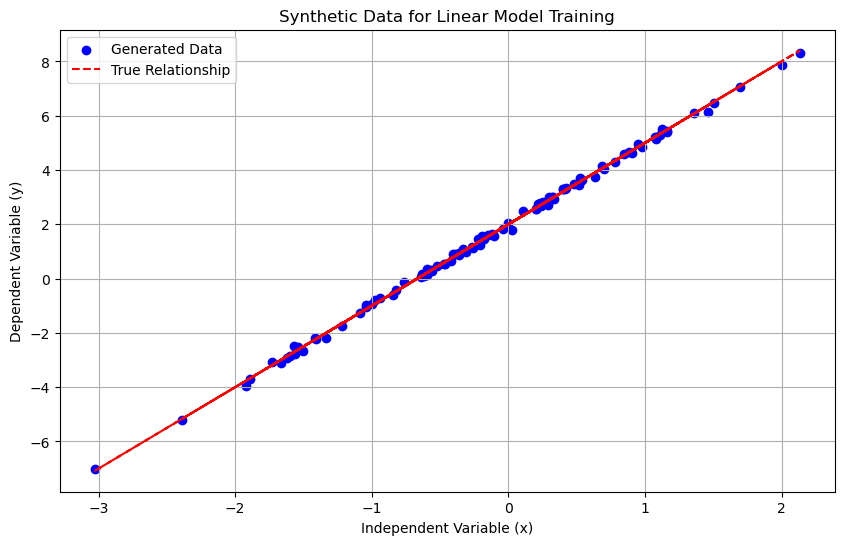

In [9]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(xs, ys, label='Generated Data', color='blue')  # Scatter plot of the noisy data
plt.plot(xs, y_true, label='True Relationship', color='red', linestyle='--') # Line plot of the true relationship

# Add labels and title
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Synthetic Data for Linear Model Training')
plt.legend()
plt.grid(True)
plt.show()

<a name="3.2"></a>
### <font color='#1f618d'> 3.2. Model </font>

We will build a simple model.

In [11]:
class Model(object):
    def __init__(self):
        # Random weight initialization, zero bias initialization
        self.w = tf.Variable(tf.random.normal(shape=[], mean=0.0, stddev=0.1))
        self.b = tf.Variable(0.0)  # Bias initialized to zero

    def __call__(self, x):
        return self.w * x + self.b


In [12]:
# loss fn.
loss_fn = tf.keras.losses.MeanSquaredError()

<a name="3.3"></a>
### <font color='#1f618d'> 3.3. Training </font>

Let's train the model using gradient descent, implemented here without tf.optimizers for learning purposes.

In [15]:
def train(model, inputs, outputs, loss_fn, learning_rate):
    """
    Performs one training step using gradient descent.

    Args:
        model: A TensorFlow model with weights `w` and `b`.
        inputs: Input data for the model.
        outputs: True target values.
        loss_fn: Loss function to compute the error.
        learning_rate: Learning rate for parameter updates.

    Returns:
        The current loss value as a float.
    """
    with tf.GradientTape() as t:
        # Compute the current loss
        current_loss = loss_fn(outputs, model(inputs))  
    
    # Compute gradients of loss with respect to model parameters
    dw, db = t.gradient(current_loss, [model.w, model.b])
    
    # Update model parameters using gradient descent
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    
    return current_loss.numpy()


We will train the model for 15 epochs:

In [17]:
# instanciate the model
model = Model()


# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []  # Lists to store parameter values for visualization
epochs = range(15)       # Number of training epochs
losses = []              # List to store loss values

# Training loop
for epoch in epochs:
    # Store current parameter values
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    
    # Perform one training step and record the loss
    current_loss = train(model, xs, ys, loss_fn, learning_rate=0.1)
    losses.append(current_loss)
    
    # Display training progress
    print(f"Epoch {epoch:2d}: w={list_w[-1]:.2f} b={list_b[-1]:.2f}, loss={current_loss:.5f}")





Epoch  0: w=0.00 b=0.00, loss=10.96367
Epoch  1: w=0.52 b=0.31, loss=7.55510
Epoch  2: w=0.96 b=0.58, loss=5.20973
Epoch  3: w=1.31 b=0.80, loss=3.59488
Epoch  4: w=1.60 b=0.99, loss=2.48238
Epoch  5: w=1.84 b=1.15, loss=1.71558
Epoch  6: w=2.04 b=1.29, loss=1.18682
Epoch  7: w=2.21 b=1.40, loss=0.82207
Epoch  8: w=2.34 b=1.50, loss=0.57038
Epoch  9: w=2.45 b=1.58, loss=0.39665
Epoch 10: w=2.55 b=1.65, loss=0.27671
Epoch 11: w=2.62 b=1.70, loss=0.19388
Epoch 12: w=2.69 b=1.75, loss=0.13667
Epoch 13: w=2.74 b=1.79, loss=0.09715
Epoch 14: w=2.78 b=1.82, loss=0.06984


<a name="3.4"></a>
### <font color='#1f618d'> 3.5. Analysis of results </font>

### Plot parameters values per epoch

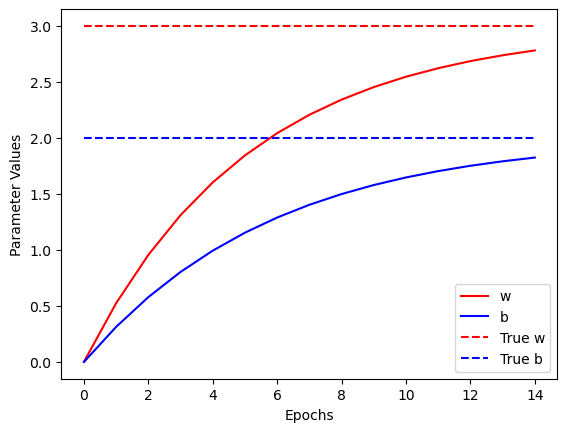

In [19]:
plt.plot(epochs, list_w, 'r', 
         epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', 
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])

# Add axis labels
plt.xlabel('Epochs')
plt.ylabel('Parameter Values')

plt.show()


### Plot data

In [20]:
def plot_data(inputs, outputs, predicted_outputs):
    real = plt.scatter(inputs, outputs, c='b', marker='.')
    predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
    plt.legend((real,predicted), ('Real Data', 'Predicted Data'))
    plt.show()

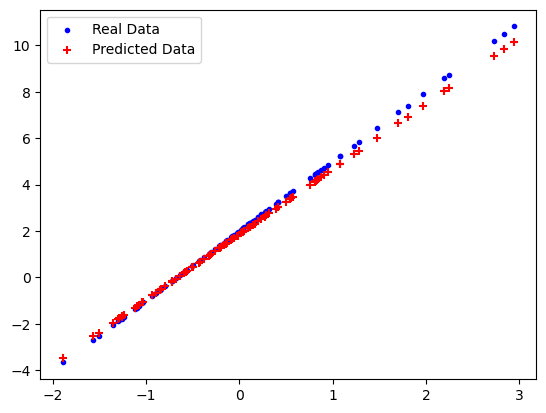

In [21]:
test_inputs  = tf.random.normal(shape=[NUM_EXAMPLES])
test_outputs = test_inputs * TRUE_w + TRUE_b

predicted_test_outputs = model(test_inputs)
plot_data(test_inputs, test_outputs, predicted_test_outputs)

### Plot loss for weights

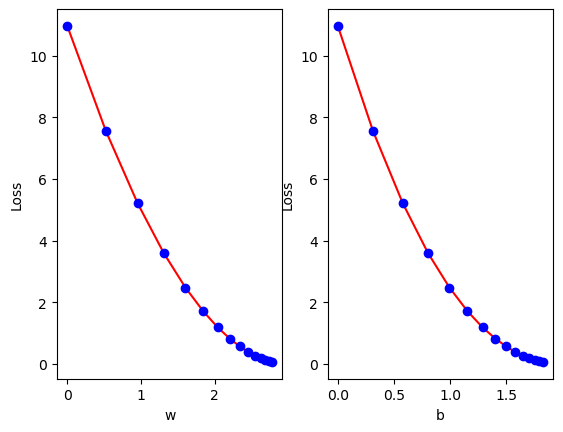

In [22]:
def plot_loss_for_weights(weights_list, losses):
    for idx, weights in enumerate(weights_list):
        plt.subplot(120 + idx + 1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)

<a name="4"></a>
## <font color='blue'> 4. Example 2 </font>

<a name="4.1"></a>
### <font color='#1f618d'> 4.1. Data </font>

In this example we will use the MNIST dataset.

In [24]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data (scaling pixel values to [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension for compatibility with CNNs
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [28]:
batch_size = 32

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=10000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

2025-03-20 19:45:21.709210: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2025-03-20 19:45:22.328606: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


<a name="4.2"></a>
### <font color='#1f618d'> 4.2. Model </font>

In [25]:
def base_model():
    inputs = tf.keras.Input(shape=(28, 28, 1), name='digits')
    x = layers.Flatten()(inputs)
    x = layers.Dense(64, activation='relu', name='dense_1')(x)
    x = layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = layers.Dense(10, activation='softmax', name='predictions')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [35]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.CategoricalCrossentropy() # remember i am using one-hot encoding for the labels                       

In [36]:
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

<a name="4.3"></a>
### <font color='#1f618d'> 4.3. Training </font>

The core of training is using the model to calculate the predictions on specific set of inputs and compute loss by comparing the predicted outputs to the true outputs. You then update the trainable weights using the optimizer algorithm chosen. Optimizer algorithm requires your computed loss and partial derivatives of loss with respect to each of the trainable weights to make updates to the same.

You use gradient tape to calculate the gradients and then update the model trainable weights using the optimizer.

In [29]:
def apply_gradient(optimizer, model, x, y):
    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        # Forward pass: compute model predictions
        predictions = model(x)
        # Compute the loss value
        loss_value = loss_object(y_true=y, y_pred=predictions)

    # Compute gradients of the loss with respect to model parameters
    gradients = tape.gradient(loss_value, model.trainable_weights)
    
    # Apply the computed gradients to update model parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    # Return predictions and the current loss value
    return predictions, loss_value

The following function performs training during one epoch. You run through all batches of training data in each epoch to make updates to trainable weights using your previous function. You can see that we also call update_state on your metrics to accumulate the value of your metrics. You are displaying a progress bar to indicate completion of training in each epoch. Here you use tqdm for displaying the progress bar.

In [30]:
def train_one_epoch(dataset, model, optimizer):
    """
    Trains the model for one epoch.

    Args:
        dataset: A TensorFlow dataset containing input-output pairs.
        model: The model to be trained.
        optimizer: The optimizer used to update the model's parameters.

    Returns:
        A list of loss values recorded during the epoch.
    """
    
    losses = []  # List to store loss values for each step

    # Progress bar for visualizing training progress
    pbar = tqdm(total=len(dataset), position=0, leave=True, 
                bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt} ')

    # Iterate over the dataset in batches
    for step, (x_batch_train, y_batch_train) in enumerate(dataset):
        # Perform a training step and compute predictions and loss
        probabilities, loss_value = apply_gradient(optimizer, model, x_batch_train, y_batch_train)
        
        # Track the loss value
        losses.append(loss_value)
        
        # Update the training accuracy metric
        train_acc_metric(y_batch_train, probabilities)
        
        # Update the progress bar with the current loss value
        pbar.set_description(f"Training loss for step {int(step)}: {float(loss_value):.4f}")
        pbar.update()

    return losses

Function to evaluate the model on the validation dataset.

In [31]:
def perform_validation(test_dataset, model):
    """
    Evaluates the model on the validation dataset.

    Args:
        test_dataset: A TensorFlow dataset containing input-output pairs for validation.
        model: The trained model to be evaluated.

    Returns:
        A list of loss values recorded during the validation process.
    """
    
    losses = []  # List to store loss values for each batch

    # Iterate over the validation dataset
    for x_val, y_val in test_dataset:
        # Generate predictions using the model
        pred = model(x_val)
        # Compute the validation loss
        val_loss = loss_object(y_true=y_val, y_pred=pred)
        # Track the loss value
        losses.append(val_loss)
        # Update the validation accuracy metric
        val_acc_metric(y_val, pred)

    return losses


Next you define the training loop that runs through the training samples repeatedly over a fixed number of epochs. Here you combine the functions you built earlier to establish the following flow:

- Perform training over all batches of training data.
- Get values of metrics.
- Perform validation to calculate loss and update validation metrics on test data.
- Reset the metrics at the end of epoch.
- Display statistics at the end of each epoch.

**Note:** You also calculate the training and validation losses for the whole epoch at the end of the epoch.

In [37]:
# Initialize the model
model = base_model()

# Number of training epochs
epochs = 5

# Lists to track average losses per epoch
epochs_val_losses, epochs_train_losses = [], []

# Iterate over epochs
for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))

    # Train the model for one epoch and track training accuracy
    losses_train = train_one_epoch(dataset, model, optimizer)
    train_acc = train_acc_metric.result()

    # Perform validation and track validation accuracy
    losses_val = perform_validation(test_dataset, model)
    val_acc = val_acc_metric.result()

    # Compute average loss values for the epoch
    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    
    # Store the average losses for later analysis
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)

    # Display epoch summary
    print(f'\nEpoch {epoch}: Train loss: {losses_train_mean:.4f}  Validation Loss: {losses_val_mean:.4f}, '
          f'Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

    # Reset metrics for the next epoch
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()


Start of epoch 0


Training loss for step 1874: 0.1172: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1875/1875 
2025-03-20 19:54:58.282042: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.



Epoch 0: Train loss: 0.2861  Validation Loss: 0.1505, Train Accuracy: 0.9171, Validation Accuracy: 0.9537
Start of epoch 1


Training loss for step 1874: 0.0389: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1875/1875 



Epoch 1: Train loss: 0.1316  Validation Loss: 0.1198, Train Accuracy: 0.9605, Validation Accuracy: 0.9640
Start of epoch 2


Training loss for step 1874: 0.0207: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1875/1875 



Epoch 2: Train loss: 0.0947  Validation Loss: 0.1065, Train Accuracy: 0.9717, Validation Accuracy: 0.9675
Start of epoch 3


Training loss for step 1874: 0.0080: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1875/1875 



Epoch 3: Train loss: 0.0741  Validation Loss: 0.0939, Train Accuracy: 0.9769, Validation Accuracy: 0.9718
Start of epoch 4


Training loss for step 1874: 0.0048: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1875/1875 



Epoch 4: Train loss: 0.0603  Validation Loss: 0.0914, Train Accuracy: 0.9813, Validation Accuracy: 0.9735


<a name="5"></a>
## <font color='blue'> 5. Example 3 </font>

<a name="5.1"></a>
### <font color='#1f618d'> 5.1. Data </font>

Again, we will generate synthetic data.

In [40]:
# Generate synthetic data
X = np.random.rand(1000, 1).astype(np.float32)
y = 3 * X + 2 + 0.1 * np.random.randn(1000, 1).astype(np.float32)

# Split data (80% train, 20% validation)
X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(800)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)

<a name="5.2"></a>
### <font color='#1f618d'> 5.2. Model </font>

In [41]:
class LinearModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = tf.keras.layers.Dense(1)

    def call(self, inputs):
        return self.dense(inputs)


<a name="5.3"></a>
### <font color='#1f618d'> 5.3. Training </font>

### Simple training

In [46]:
# instanciate the model
model = LinearModel()

# optimizer and loss fn.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

# Custom training loop
for epoch in range(10):
    # Training step
    with tf.GradientTape() as tape:  # Track operations for automatic differentiation
        predictions = model(X_train)  # Forward pass: model predictions
        loss = loss_fn(y_train, predictions)  # Compute the training loss

    # Compute gradients of the loss with respect to model parameters
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # Apply the computed gradients to update model parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation step (ensuring consistent shapes and no training-specific behavior)
    val_predictions = model(X_val, training=False)  # Disable training-specific layers like dropout
    val_loss = loss_fn(y_val, val_predictions).numpy()  # Compute the validation loss

    # Display loss values for the current epoch
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss:.4f}")

Epoch 1, Loss: 14.9670, Val Loss: 13.6557
Epoch 2, Loss: 14.2340, Val Loss: 12.9808
Epoch 3, Loss: 13.5377, Val Loss: 12.3397
Epoch 4, Loss: 12.8761, Val Loss: 11.7308
Epoch 5, Loss: 12.2475, Val Loss: 11.1525
Epoch 6, Loss: 11.6503, Val Loss: 10.6032
Epoch 7, Loss: 11.0828, Val Loss: 10.0815
Epoch 8, Loss: 10.5437, Val Loss: 9.5860
Epoch 9, Loss: 10.0315, Val Loss: 9.1154
Epoch 10, Loss: 9.5448, Val Loss: 8.6684


### Now let's train the model in batches

In [49]:
# instanciate the model
model = LinearModel()

# optimizer and loss fn.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

# Custom training loop
for epoch in range(10):
    # Training loop (processes data in batches)
    for x_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:  # Track operations for automatic differentiation
            predictions = model(x_batch)  # Forward pass: model predictions for the batch
            loss = loss_fn(y_batch, predictions)  # Compute batch loss

        # Compute gradients of the loss with respect to model parameters
        gradients = tape.gradient(loss, model.trainable_variables)
        # Apply the computed gradients to update model parameters
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation loop (processes data in batches)
    val_loss = tf.keras.metrics.Mean()  # Track average validation loss
    for x_val, y_val in val_ds:
        val_predictions = model(x_val)  # Forward pass for validation data
        val_loss.update_state(loss_fn(y_val, val_predictions))  # Accumulate validation loss

    # Display loss values for the current epoch
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {val_loss.result().numpy():.4f}")


Epoch 1, Loss: 2.1697, Val Loss: 2.2455
Epoch 2, Loss: 0.7443, Val Loss: 0.6376
Epoch 3, Loss: 0.2001, Val Loss: 0.1925
Epoch 4, Loss: 0.0863, Val Loss: 0.0701
Epoch 5, Loss: 0.0366, Val Loss: 0.0360
Epoch 6, Loss: 0.0212, Val Loss: 0.0264
Epoch 7, Loss: 0.0237, Val Loss: 0.0233
Epoch 8, Loss: 0.0216, Val Loss: 0.0220
Epoch 9, Loss: 0.0185, Val Loss: 0.0213
Epoch 10, Loss: 0.0158, Val Loss: 0.0207


### Adding Early Stopping

In [50]:
model = LinearModel()  # Initialize the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Stochastic Gradient Descent optimizer
loss_fn = tf.keras.losses.MeanSquaredError()  # Mean Squared Error loss function

# Early stopping parameters
best_val_loss = float('inf')  # Track the best validation loss
patience = 5  # Number of epochs to wait before stopping if no improvement
wait = 0  # Counter for patience tracking

# Custom training loop
for epoch in range(10):
    # Training loop (processes data in batches)
    for x_batch, y_batch in train_ds:
        with tf.GradientTape() as tape:  # Track operations for differentiation
            predictions = model(x_batch)  # Forward pass for batch
            loss = loss_fn(y_batch, predictions)  # Compute batch loss

        # Compute and apply gradients to update model parameters
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Validation loop (processes data in batches)
    val_loss = tf.keras.metrics.Mean()  # Track average validation loss
    for x_val, y_val in val_ds:
        val_predictions = model(x_val)  # Forward pass for validation data
        val_loss.update_state(loss_fn(y_val, val_predictions))  # Accumulate validation loss

    # Display loss values for the current epoch
    current_val_loss = val_loss.result().numpy()
    print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}, Val Loss: {current_val_loss:.4f}")

    # Early stopping logic
    if current_val_loss < best_val_loss:
        best_val_loss = current_val_loss  # Update the best validation loss
        wait = 0  # Reset patience counter
    else:
        wait += 1  # Increment patience counter
        if wait >= patience:  # Stop if no improvement after 'patience' epochs
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1, Loss: 5.4731, Val Loss: 5.4503
Epoch 2, Loss: 2.1534, Val Loss: 1.8139
Epoch 3, Loss: 1.1660, Val Loss: 0.8081
Epoch 4, Loss: 0.4732, Val Loss: 0.5237
Epoch 5, Loss: 0.4180, Val Loss: 0.4316
Epoch 6, Loss: 0.4168, Val Loss: 0.3911
Epoch 7, Loss: 0.4290, Val Loss: 0.3642
Epoch 8, Loss: 0.3687, Val Loss: 0.3417
Epoch 9, Loss: 0.3656, Val Loss: 0.3208
Epoch 10, Loss: 0.3000, Val Loss: 0.3011


<a name="references"></a>
## <font color='blue'> 6. References </font>

[TF Advanced Techniques](https://www.coursera.org/specializations/tensorflow-advanced-techniques)